In [1]:
import pandas as pd
import numpy as np

In [2]:
amir_deals = pd.read_csv('data/amir_deals.csv')
amir_deals.head()

,Unnamed: 0,product,client,status,amount,num_users
0,1,Product F,Current,Won,7389.52,19
1,2,Product C,New,Won,4493.01,43
2,3,Product B,New,Won,5738.09,87
3,4,Product I,Current,Won,2591.24,83
4,5,Product E,Current,Won,6622.97,17


In [3]:
amir_deals.shape

(178, 6)

# Sampling the deals

Finding the number of deals associated with each product type.

In [4]:
counts = amir_deals['product'].value_counts()
print(counts)

Product B    62
Product D    40
Product A    23
Product C    15
Product F    11
Product H     8
Product I     7
Product E     5
Product N     3
Product G     2
Product J     2
Name: product, dtype: int64


### What is the probability of selecting a deal for the different product types?

In [5]:
probs = counts / amir_deals['product'].value_counts().sum()

print(probs)

Product B    0.348315
Product D    0.224719
Product A    0.129213
Product C    0.084270
Product F    0.061798
Product H    0.044944
Product I    0.039326
Product E    0.028090
Product N    0.016854
Product G    0.011236
Product J    0.011236
Name: product, dtype: float64


### Randomnly pick 5 deals with replacement and without replacement


In [6]:
#step 1: set the seed to get the same value everytime

np.random.seed(24)

#without replacement
sample_without_replacement= amir_deals.sample(5, replace = False)
print(sample_without_replacement)

print("\n WITH REPLACEMENT \n")
#with replacement
sample_with_replacement= amir_deals.sample(5, replace = True)
print(sample_with_replacement)

     Unnamed: 0    product   client status   amount  num_users
127         128  Product B  Current    Won  2070.25          7
148         149  Product D  Current    Won  3485.48         52
77           78  Product B  Current    Won  6252.30         27
104         105  Product D  Current    Won  4110.98         39
166         167  Product C      New   Lost  3779.86         11

 WITH REPLACEMENT 

     Unnamed: 0    product   client status   amount  num_users
133         134  Product D  Current    Won  5992.86         98
101         102  Product H  Current    Won  5116.34         63
110         111  Product B  Current    Won   696.88         44
49           50  Product B  Current    Won  3488.36         79
56           57  Product D  Current    Won  6820.84         42


## Creating a Probability Distribution

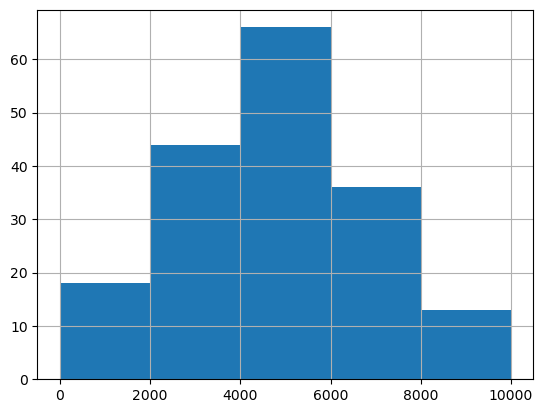

In [7]:
import matplotlib.pyplot as plt

amir_deals['amount'].hist(bins = np.linspace(0,10000,6))
plt.show()

In [8]:
# What is the mean amount for each product type
mean_amount_by_product = amir_deals.groupby('product')['amount'].agg([np.mean])
print(mean_amount_by_product)
      
#Now you have expected value of each product

mean_amount_by_product['counts'] = amir_deals['product'].value_counts()
mean_amount_by_product['probs'] = probs

mean_amount_by_product.head()

                  mean
product               
Product A  5228.240000
Product B  4840.396452
Product C  3386.596667
Product D  5094.949000
Product E  4894.302000
Product F  4977.383636
Product G  6671.095000
Product H  4432.011250
Product I  3915.044286
Product J  3725.980000
Product N  6235.590000


,mean,counts,probs
product,,,
Product A,5228.240000,23,0.129213
Product B,4840.396452,62,0.348315
Product C,3386.596667,15,0.084270
Product D,5094.949000,40,0.224719
Product E,4894.302000,5,0.028090


In [9]:
## Expected Value of a deal

expected_value = np.sum(mean_amount_by_product['mean'] * mean_amount_by_product['probs'])
print(expected_value)


#method 2
e2 = np.mean(amir_deals['amount'])
print(e2)

4812.000337078651
4812.000337078652


# Continuous Distributions

In [10]:
#The sales software used at your company is set to automatically back itself up, but no one knows exactly what time the back-ups happen. 
#It is known, however, that back-ups happen exactly every 30 minutes.
min_time = 0
max_time = 30

## Uniform distribution with probabilities

In [11]:
#draw a uniform distibution and calculate the probability of waiting 5 or less minutes
from scipy.stats import uniform

prob_less_than_5 = uniform.cdf(5,0,30)
print(prob_less_than_5)

prob_more_than_5 = 1 - uniform.cdf(5,0,30)
print(prob_more_than_5)

prob_10_20 = uniform.cdf(20,0,30) - uniform.cdf(10, 0, 30)
print(prob_10_20)

0.16666666666666666
0.8333333333333334
0.3333333333333333


## Generating random numbers from uniform distribution

In [12]:
#generating random numbers from uniform distribution
values = uniform.rvs(min_time, max_time, 5)
print("5 random values: ", values)

5 random values:  [17.53732609 27.1316477   0.58179034 15.58291408  7.87247851]


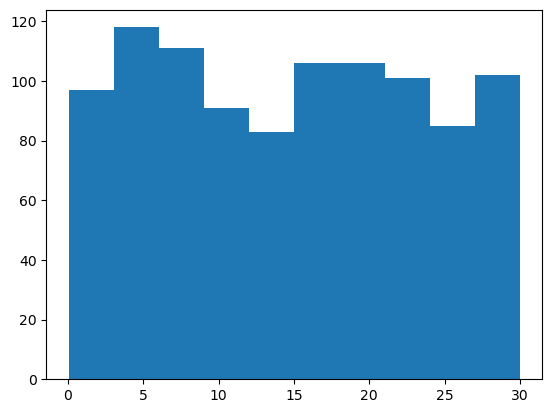

In [13]:
#Generating 1000 simulations of wait times
np.random.seed(334)
wait_times_1000 = uniform.rvs(min_time, max_time,1000)

#wait_times_1000 is a np array: plt.hist(wait_times)
plt.hist(wait_times_1000)
plt.show()

In [14]:
# Binomial Distributions
'''Binary Outcomes'''

from scipy.stats import binom

#syntax: binom.rvs(# of coins, probability of heads/success, size=# of trials) 
    
#flipping 1 coin
binom.rvs(1,0.5, size = 1)

array([1])

In [15]:
# flipping one coin 8 times
binom.rvs(1, 0.5, size = 8)

array([1, 0, 0, 1, 0, 0, 1, 0])

In [16]:
#flipping 8 coins one time
binom.rvs(8,0.5, size = 1)

#returns the number of heads

array([3])

In [17]:
# binom.pmf(num heads, num trials, prob of heads
binom.pmf(7,10,0.5)

0.11718750000000004

In [18]:
binom.cdf(7,10,0.5)
#probability of getting 7 or less heads on 10 flips

0.9453125

# Normal Distribution

In [19]:
from scipy.stats import norm

#what % of women are shorter than 154 cm?
#syntax: norm.cdf(154, mean, std)
women_shorter_than_154 = norm.cdf(154,166,3)
print("% of women shorter than 154 cm:", women_shorter_than_154*100, "\n")

#generating 10 random numbers from the normal distribution
#syntax: norm.rvs(mean, std, size = 10)

random_heights = norm.rvs(166,3,10)
print("10 random heights from the distribution:", random_heights )


# what height are 90% women shorter than: calculate 90th percentile# 
value = norm.ppf(0.9, 161, 7)
print("90% women are shorter than: ", value)

# what height are 90% women taller than: calculate 10th percentile
value = norm.ppf(0.1, 161, 7)
print("90% women are taller than: ", value)

% of women shorter than 154 cm: 0.003167124183311986 

10 random heights from the distribution: [170.65765776 166.87207224 160.29369336 165.79932365 162.10283104
 162.80149792 164.82903532 170.90550085 164.77748887 166.67399952]
90% women are shorter than:  169.9708609588122
90% women are taller than:  152.0291390411878


## Amir's Deals

### Visualize the amount of Amir's Deals. Is it normal?

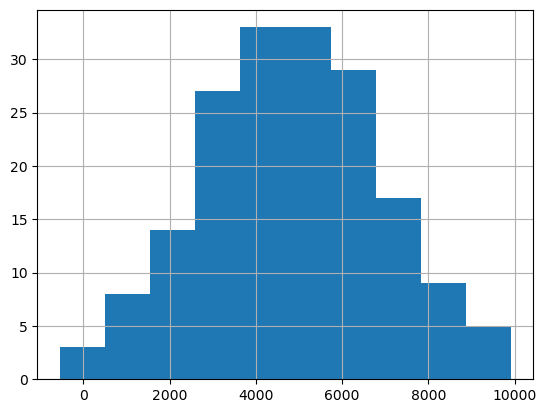

In [20]:
amir_deals['amount'].hist(bins = 10)
plt.show()


It is a normal distribution. 

### What's the probability of Amir closing a deal worth less than $7500?

In [21]:
mean = np.mean(amir_deals['amount'])
std = np.std(amir_deals['amount'])

prob_less_than_7500 = norm.cdf(7500, mean, std)
print(prob_less_than_7500)

0.9048507292128808


### What's the probability of Amir closing a deal worth more than $1000?

In [22]:
prob_more_than_1000 = 1 - norm.cdf(1000, mean, std)
print(prob_more_than_1000)

0.9683695021571027


### What's the probability of Amir closing a deal worth between $3000  $and$ $7000?

In [23]:
prob_3000_to_7000 = norm.cdf(7000,mean,std) - norm.cdf(3000,mean,std)
print(prob_3000_to_7000)

0.6681540168075063


### What amount will 25% of Amir's sales be less than?

In [24]:
less_than_25 = norm.ppf(0.25, mean, std)
print(less_than_25)

3427.6885699296663


## CENTRAL LIMIT THEOREM

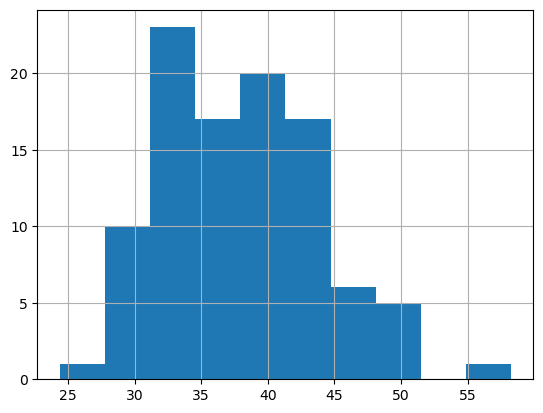

In [25]:
# Set seed to 104
np.random.seed(104)

sample_means = []
# Loop 100 times
for i in range(100):
  # Take sample of 20 num_users
  samp_20 = amir_deals['num_users'].sample(20, replace=True)
  # Calculate mean of samp_20
  samp_20_mean = np.mean(samp_20)
  # Append samp_20_mean to sample_means
  sample_means.append(samp_20_mean)
  
# Convert to Series and plot histogram
sample_means_series = pd.Series(sample_means)
sample_means_series.hist()
# Show plot
plt.show()

## Poisson's Distribution


In [26]:
from scipy.stats import poisson
mean = 8

poisson.pmf(5,8)

0.09160366159257921

In [27]:
poisson.cdf(5, 8)

0.19123606207962532

## Lambda -> where the distribution peaks or expected value of poisson's distribution

## Exponential distribution, expected value = 1/lambda, this is called scale. 

## T- distribution -> dof, higher df = closer to normal

## Log Normal Distribution -> Blood Pressure, Hospitals in Epidemic

# Exponential Distribution

In [28]:
from scipy.stats import expon

# Print probability response takes > 4 hours
# syntax: expon.cdf(4, scale = 1/lambda)
print(1- expon.cdf(4,scale = 2.5))

0.20189651799465536


# Correlation (r)

### Visualize them -> Scatter Plot
###  Examine -> Correlation
### Strength -> Magntiude
### Direction -> Sign

In [30]:
ls data

amir_deals.csv        food_consumption.csv  world_happiness.csv


In [31]:
happy = pd.read_csv("data/world_happiness.csv")
happy.head()

,Unnamed: 0,country,social_support,freedom,corruption,generosity,gdp_per_cap,life_exp,happiness_score
0,1,Finland,2.0,5.0,4.0,47.0,42400,81.8,155
1,2,Denmark,4.0,6.0,3.0,22.0,48300,81.0,154
2,3,Norway,3.0,3.0,8.0,11.0,66300,82.6,153
3,4,Iceland,1.0,7.0,45.0,3.0,47900,83.0,152
4,5,Netherlands,15.0,19.0,12.0,7.0,50500,81.8,151


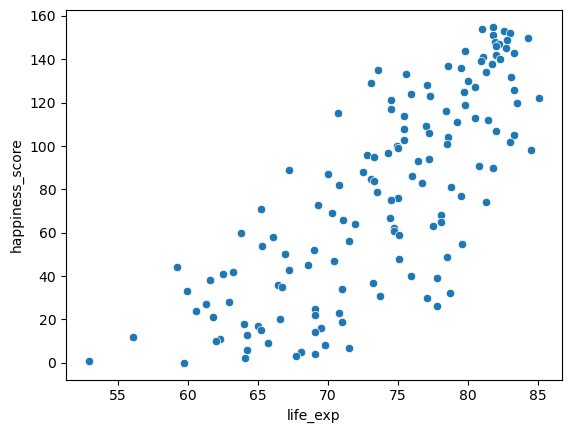

In [37]:
import seaborn as sns


sns.scatterplot(x = "life_exp", y = "happiness_score", data = happy)

plt.show()

## Adding a trendline

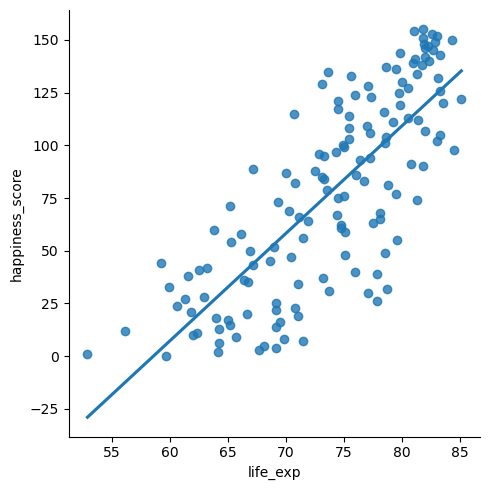

In [40]:

sns.lmplot(x = "life_exp", y = "happiness_score", data = happy, ci = None)
plt.show()

In [42]:
# Correlation between life_exp and happiness_score
cor = happy['life_exp'].corr(happy['happiness_score'])
print(cor)

0.7802249053272062


# Correlation Caveats
Correlation is used only for linear data. Otherwise, it is of no use, despite the magnitude.

## 1. Non-Linear Relationship -> Visualize data before
## 2. Then Transform: Log Transformation (Skewed Data)

Other Transformations: Square Root Transformation, Reciprocal Transformation, Combination transformations (sqrt(x) and log(y))

## 3. Correlation doesn't imply causation.



# Handling Non - Linear Relationships

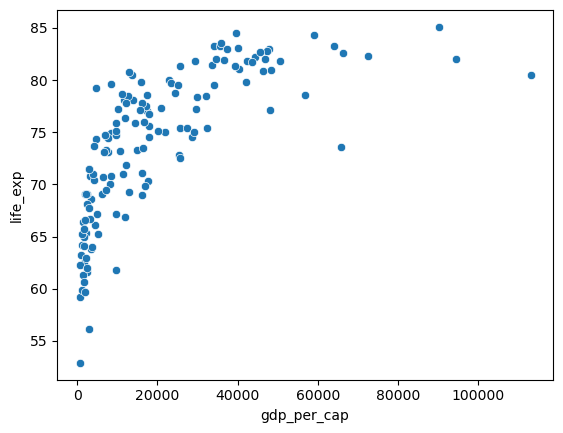

In [44]:
# Scatterplot of gdp_per_cap and life_exp
sns.scatterplot(x = "gdp_per_cap", y = "life_exp", data = happy)

# Show plot
plt.show()

In [46]:
# Correlation between gdp_per_cap and life_exp
cor = happy['gdp_per_cap'].corr(happy['life_exp'])

print(cor)

0.7019547642148015


## Step 1: Visualize the Data

Currently we are considering the gdp of a country (gdp_per_cap) and the happiness score of the country (happiness_score).


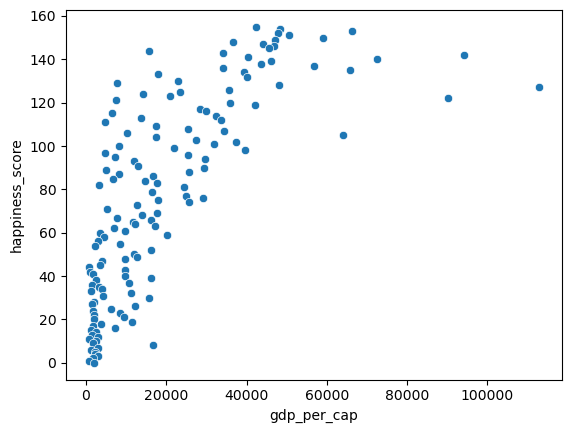

In [47]:
# Scatter Plot between gdp_per_cap and happiness_score

sns.scatterplot(x = "gdp_per_cap", y = "happiness_score", data = happy)
plt.show()

In [49]:
# Calculate correlation
cor = happy['happiness_score'].corr(happy['gdp_per_cap'])
print(cor)

0.7279733012222976


## Step 2: Log Transformation

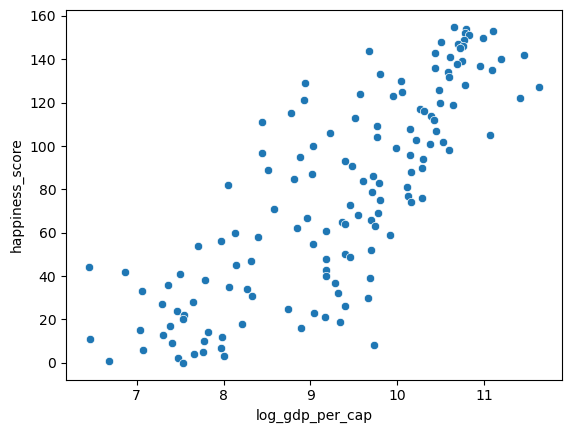

In [51]:
happy['log_gdp_per_cap'] = np.log(happy['gdp_per_cap'])

sns.scatterplot(x = "log_gdp_per_cap", y = "happiness_score", data = happy)
plt.show()

In [52]:
# Now that we see a linear relationship, we'll find out the correlation

cor = happy['log_gdp_per_cap'].corr(happy['happiness_score'])
print(cor)

0.8043146004918288
